1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
    * Building a larger model (how does one with 4 dense layers go?).
    * Increasing the number of units in each layer.
    * Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
    * What happens if you train for longer (say 300 epochs instead of 200)?
4. Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

In [1]:
import tensorflow as tf

## 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

### Creating a custom dataset and visualising it

In [2]:
# Creating a custom dataset
from sklearn.datasets import make_regression
features, target = make_regression(n_samples = 100, n_features = 1, n_informative = 5, random_state = 42)
x = tf.squeeze(tf.constant(features))
y = tf.constant(target)

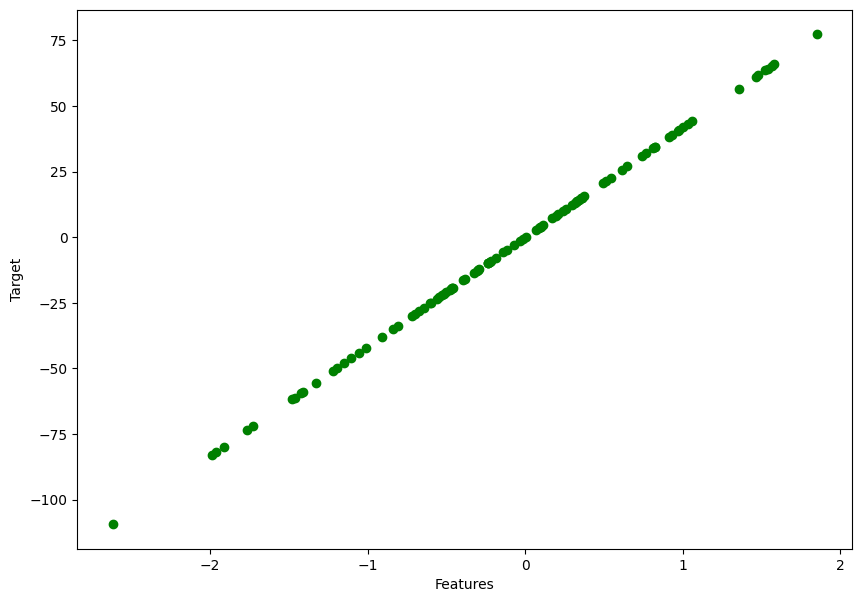

In [3]:
# Visualise the custome dataset
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
plt.scatter(x, y, c = 'g')
plt.xlabel("Features")
plt.ylabel("Target")
plt.show()

In [4]:
x.shape, y.shape

(TensorShape([100]), TensorShape([100]))

### Splitting the data in training set and testing set

In [5]:
# Training Set
X_train = x[:80]
y_train = y[:80]
# Testing Set
X_test = x[80:]
y_test = y[80:]

In [6]:
# Building a simple neural network model to fit the data
import tensorflow as tf
# Setting the seed
tf.random.set_seed(42)

# Create a model
model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_0.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# Fit the model
history_0 = model_0.fit(tf.expand_dims(X_train, -1), y_train, epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 15ms/step - loss: 32.4759 - mae: 32.4759
Epoch 2/100
3/3 [==============================] - 0s 10ms/step - loss: 32.3696 - mae: 32.3696
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 32.2592 - mae: 32.2592
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 32.1538 - mae: 32.1538
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 32.0435 - mae: 32.0435
Epoch 6/100
3/3 [==============================] - 0s 8ms/step - loss: 31.9382 - mae: 31.9382
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 31.8288 - mae: 31.8288
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 31.7161 - mae: 31.7161
Epoch 9/100
3/3 [==============================] - 0s 10ms/step - loss: 31.5998 - mae: 31.5998
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 31.4836 - mae: 31.4836
Epoch 11/100
3/3 [==============================] - 0s 

<Axes: >

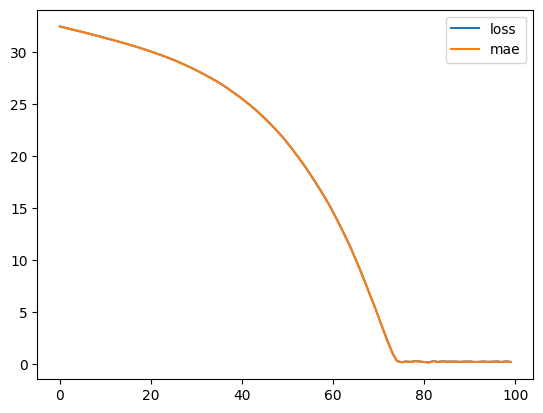

In [7]:
import pandas as pd
pd.DataFrame(history_0.history).plot()

In [8]:
# Evaluate the model
model_0.evaluate(X_test, y_test)

1/1 [==============================] - 0s 481ms/step - loss: 0.3867 - mae: 0.3867


[0.38665762543678284, 0.38665762543678284]

In [9]:
# Prediction
y_pred_0 = model_0.predict(X_test)

1/1 [==============================] - 0s 279ms/step


In [10]:
# Mean Absolute Error
mae_0 = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_0))
mae_0

<tf.Tensor: shape=(), dtype=float32, numpy=0.38665763>

## 2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?


### Neural Netword with 4 Dense layer

In [11]:
# Setting the seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# Fit the model
history_1 = model_1.fit(tf.expand_dims(X_train, -1), y_train, epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 10ms/step - loss: 32.3359 - mae: 32.3359
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 32.2699 - mae: 32.2699
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 32.1985 - mae: 32.1985
Epoch 4/100
3/3 [==============================] - 0s 10ms/step - loss: 32.1259 - mae: 32.1259
Epoch 5/100
3/3 [==============================] - 0s 8ms/step - loss: 32.0424 - mae: 32.0424
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 31.9536 - mae: 31.9536
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 31.8497 - mae: 31.8497
Epoch 8/100
3/3 [==============================] - 0s 12ms/step - loss: 31.7262 - mae: 31.7262
Epoch 9/100
3/3 [==============================] - 0s 9ms/step - loss: 31.5767 - mae: 31.5767
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 31.3997 - mae: 31.3997
Epoch 11/100
3/3 [==============================] - 0s

<Axes: >

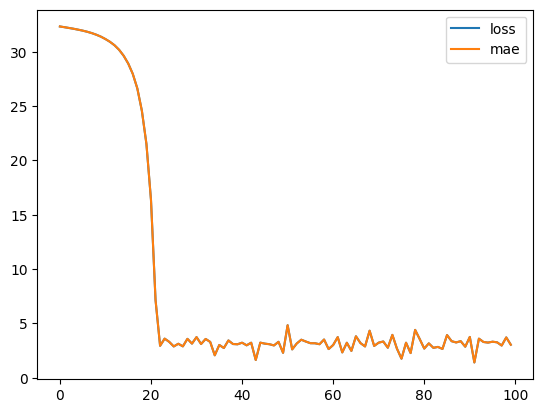

In [12]:
pd.DataFrame(history_1.history).plot()

In [13]:
# Evaluate the model
model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 363ms/step - loss: 4.4985 - mae: 4.4985


[4.4984869956970215, 4.4984869956970215]

In [14]:
# Prdiction
y_pred_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 167ms/step


In [15]:
# Mean Absolute Error
mae_1 = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_1))
mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=4.498486>

### Neural Networks with 4 Dense layer and optimizer as `Adam()`

In [16]:
# Setting the seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# Fit the model
history_2 = model_2.fit(tf.expand_dims(X_train, -1), y_train, epochs = 100)

Epoch 1/100
3/3 [==============================] - 3s 28ms/step - loss: 32.2171 - mae: 32.2171
Epoch 2/100
3/3 [==============================] - 0s 25ms/step - loss: 32.0951 - mae: 32.0951
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 31.9821 - mae: 31.9821
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 31.8509 - mae: 31.8509
Epoch 5/100
3/3 [==============================] - 0s 8ms/step - loss: 31.7254 - mae: 31.7254
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 31.5818 - mae: 31.5818
Epoch 7/100
3/3 [==============================] - 0s 10ms/step - loss: 31.4312 - mae: 31.4312
Epoch 8/100
3/3 [==============================] - 0s 29ms/step - loss: 31.2658 - mae: 31.2658
Epoch 9/100
3/3 [==============================] - 0s 13ms/step - loss: 31.0821 - mae: 31.0821
Epoch 10/100
3/3 [==============================] - 0s 18ms/step - loss: 30.8788 - mae: 30.8788
Epoch 11/100
3/3 [==============================] - 0

<Axes: >

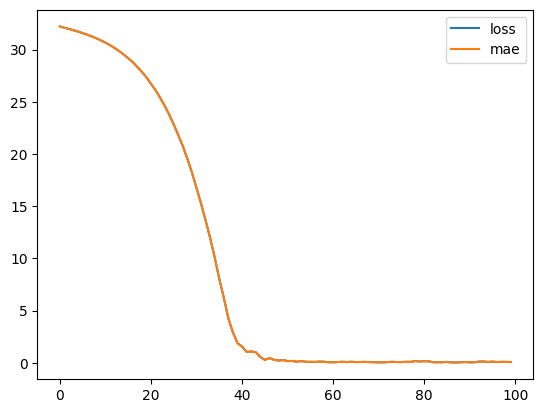

In [17]:
pd.DataFrame(history_2.history).plot()

In [18]:
# Evaluate the model
model_2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 290ms/step - loss: 0.0646 - mae: 0.0646


[0.06455538421869278, 0.06455538421869278]

In [19]:
# Prdiction
y_pred_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 113ms/step


In [20]:
# Mean Absolute Error
mae_2 = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_2))
mae_2

<tf.Tensor: shape=(), dtype=float32, numpy=0.06455581>

In [21]:
X_test.shape

TensorShape([20])

### Visualise the Model's Prediction

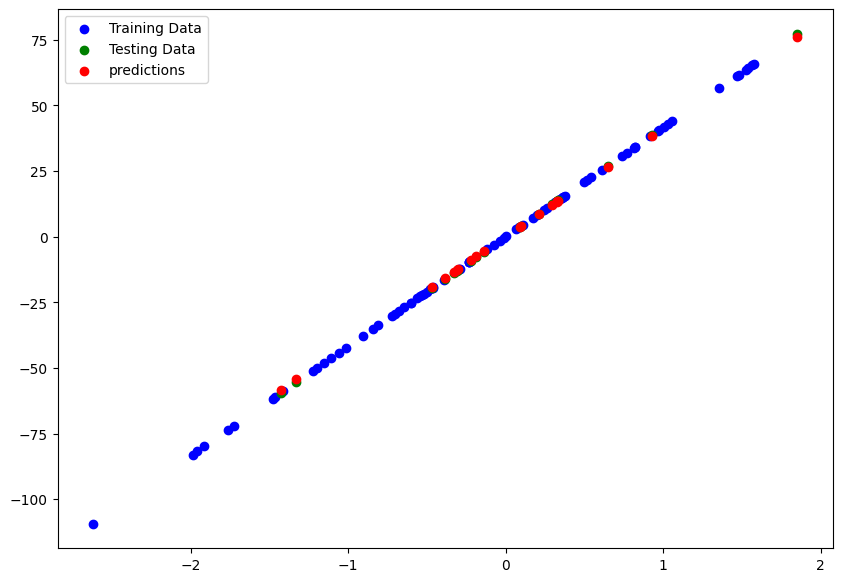

In [22]:
# Visualisation using prediction values from `model_0`
plt.figure(figsize = (10,7))
plt.scatter(X_train, y_train, c = 'b', label = "Training Data")
plt.scatter(X_test, y_test, c = 'g', label = "Testing Data")
plt.scatter(X_test, y_pred_0, c = 'r', label = "predictions")
plt.legend()
plt.show()

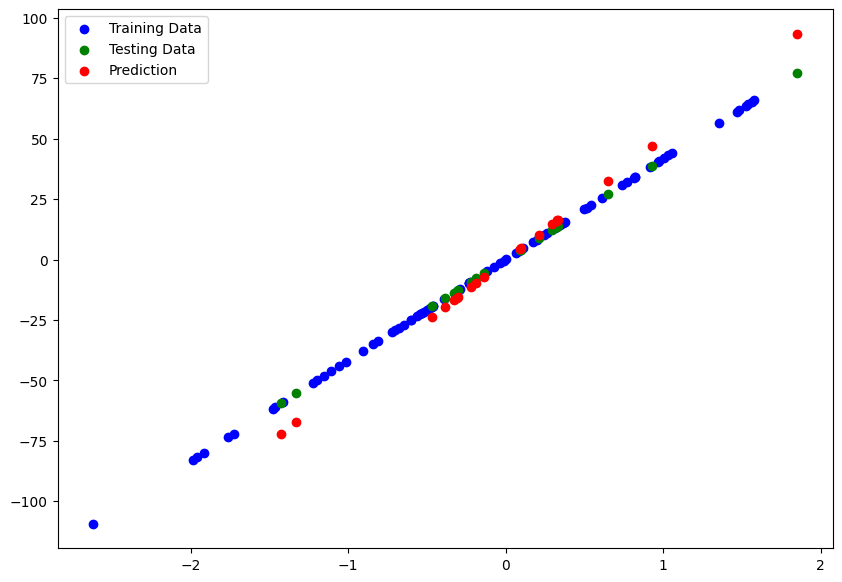

In [23]:
# Visualisation using prediction values from `model_1`
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, c = 'b', label = "Training Data")
plt.scatter(X_test, y_test, c = 'g', label = "Testing Data")
plt.scatter(X_test, y_pred_1, c = 'r', label = "Prediction")
plt.legend()
plt.show();

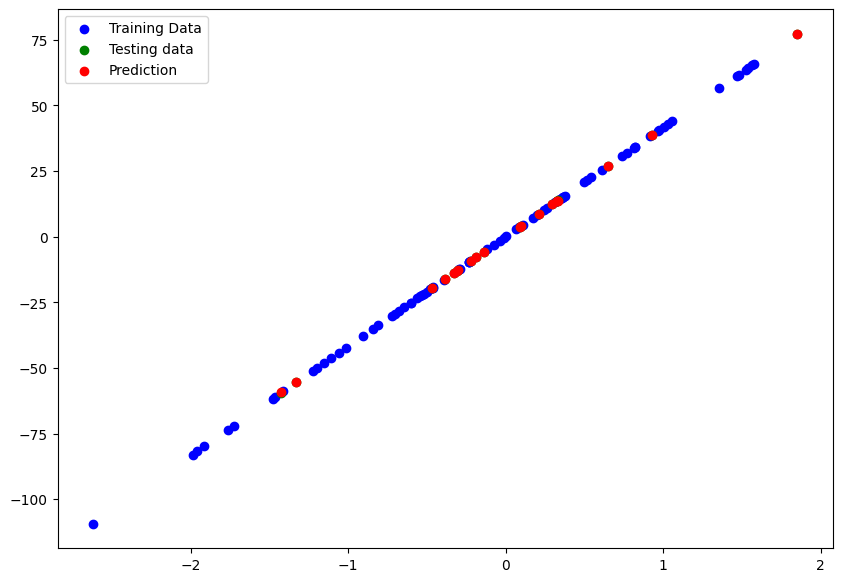

In [24]:
# Visualisation using prediction values from `model_2`
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, c = 'b', label = "Training Data")
plt.scatter(X_test, y_test, c = 'g', label = "Testing data")
plt.scatter(X_test, y_pred_2, c = 'r', label = "Prediction")
plt.legend()
plt.show();

## 3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
    * Building a larger model (how does one with 4 dense layers go?).
    * Increasing the number of units in each layer.
    * Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
    * What happens if you train for longer (say 300 epochs instead of 200)?


In [25]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

### Reading the data

In [26]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [27]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Preprocessing the data (normalising and standardising the data)

In [29]:
# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer((MinMaxScaler(), ["age", "bmi", "children"]),
                             (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"]))

In [30]:
# Split the dataset into feature (x) and labels (y)
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

In [31]:
# Spliting the dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
# Fit X_train into ct
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [33]:
# Transform
X_train_transformed = ct.transform(X_train)
X_test_transformed = ct.transform(X_test)

In [34]:
X_train.iloc[0]

age                46
sex            female
bmi             19.95
children            2
smoker             no
region      northwest
Name: 560, dtype: object

In [35]:
X_train_transformed[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [36]:
# Shape
X_train.shape, X_train_transformed.shape

((1070, 6), (1070, 11))

### Creating a Larger Model
> Including four dense layer

> Increasing the number of units in each layer.


> Using Adam() optimizer

> Increasing epochs by 300


In [37]:
# Setting the seed
tf.random.set_seed(42)

# Creating a Sequential Model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compiling the model
insurance_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

# Fit the model
insurance_history = insurance_model.fit(X_train_transformed, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13343.9062 - mae: 13343.9062
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13331.1104 - mae: 13331.1104
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13278.4502 - mae: 13278.4502
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13117.1143 - mae: 13117.1143
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 12728.6191 - mae: 12728.6191
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 11945.0195 - mae: 11945.0195
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 10733.4023 - mae: 10733.4023
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 9420.6855 - mae: 9420.6855
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 8458.1338 - mae: 8458.1338
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 8019.9702 - 

In [38]:
# Evaluate the model
insurance_model.evaluate(X_test_transformed, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3182.3000 - mae: 3182.3000


[3182.300048828125, 3182.300048828125]

<Axes: >

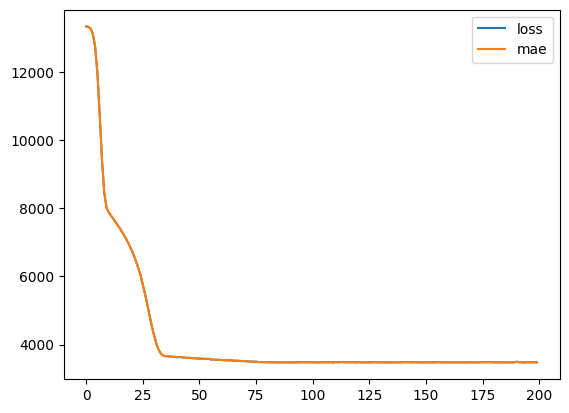

In [39]:
# Ploting the history of the model
pd.DataFrame(insurance_history.history).plot()

In [40]:
# Setting the seed
tf.random.set_seed(42)

# Creating a Sequential Model
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(6),
    tf.keras.layers.Dense(1)
])

# Compiling the model
insurance_model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

# Fit the model
insurance_history_1 = insurance_model_1.fit(X_train_transformed, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13344.9453 - mae: 13344.9453
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13343.4238 - mae: 13343.4238
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13340.0703 - mae: 13340.0703
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13332.4248 - mae: 13332.4248
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13315.7080 - mae: 13315.7080
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13282.6191 - mae: 13282.6191
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13223.1572 - mae: 13223.1572
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13124.6230 - mae: 13124.6230
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12971.6299 - mae: 12971.6299
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 12746.56

In [41]:
# Evaluate the model
insurance_model_1.evaluate(X_test_transformed, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3405.4058 - mae: 3405.4058


[3405.40576171875, 3405.40576171875]

<Axes: >

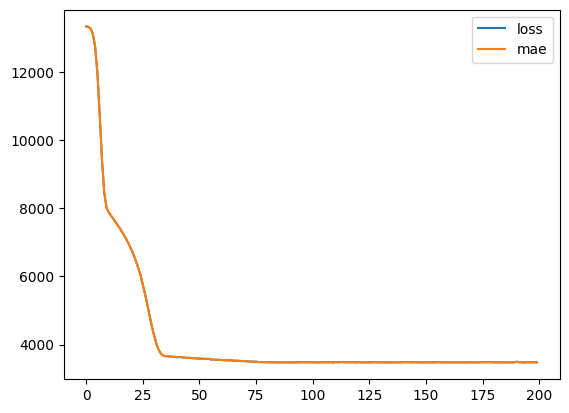

In [42]:
# Ploting the history of the model
pd.DataFrame(insurance_history.history).plot()

In [49]:
# Setting the seed
tf.random.set_seed(42)

# Build the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# Fit thee model
insurance_history_2 = insurance_model_2.fit(X_train_transformed, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 13343.6699 - mae: 13343.6699
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13332.0557 - mae: 13332.0557
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13284.8672 - mae: 13284.8672
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13135.6670 - mae: 13135.6670
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 12768.2109 - mae: 12768.2109
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 12020.9648 - mae: 12020.9648
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 10833.1143 - mae: 10833.1143
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 9516.5820 - mae: 9516.5820
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 8504.4697 - mae: 8504.4697
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 8013.5674 - 

In [48]:
# Evaluate the model
insurance_model_2.evaluate(X_test_transformed, y_test)

9/9 [==============================] - 1s 8ms/step - loss: 2825.3364 - mae: 2825.3364


[2825.33642578125, 2825.33642578125]

<Axes: >

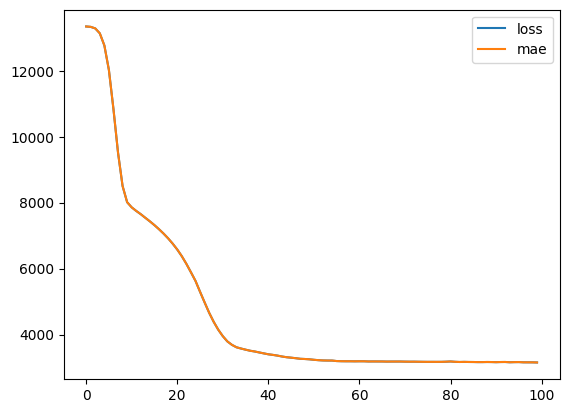

In [50]:
pd.DataFrame(insurance_history_2.history).plot()

## 4. Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

In [56]:
# Importing the dataset from tensorflow
boston_pricing = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=113)
boston_pricing

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [57]:
# Splittiong it into training and testing sets
(X_train, y_train), (X_test, y_test) = boston_pricing

In [58]:
# Shape
X_train.shape, y_train.shape

((404, 13), (404,))

In [63]:
# Building the model for boston dataset
# Setting the seed
tf.random.set_seed(42)

# Create a model
boston_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model
boston_model_0.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae', 'mse']
)

# Fit the model
boston_history_0 = boston_model_0.fit(X_train, y_train, epochs = 100)

Epoch 1/100
13/13 [==============================] - 2s 7ms/step - loss: 40.6232 - mae: 40.6232 - mse: 2688.6335
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 13.2220 - mae: 13.2220 - mse: 254.9893
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 9.1000 - mae: 9.1000 - mse: 136.8128
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 6.4931 - mae: 6.4931 - mse: 76.8960
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 4.9552 - mae: 4.9552 - mse: 54.0656
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 4.7973 - mae: 4.7973 - mse: 50.4558
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 5.0098 - mae: 5.0098 - mse: 56.1592
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 4.7019 - mae: 4.7019 - mse: 45.8258
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 5.2995 - mae: 5.2995 - mse: 56.5280
Epoch 10/10

In [64]:
# Evaluate the model
boston_model_0.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.6000 - mae: 3.6000 - mse: 29.1774


[3.5999693870544434, 3.5999693870544434, 29.177398681640625]

<Axes: >

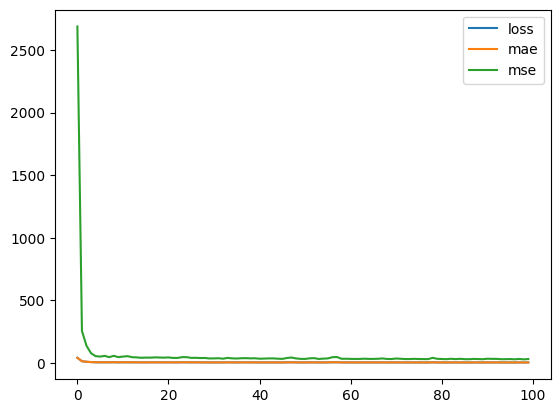

In [65]:
# Plot loss curve
pd.DataFrame(boston_history_0.history).plot()

In [69]:
y_pred_01 = boston_model_0.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [66]:
# Building the model for boston dataset
# Setting the seed
tf.random.set_seed(42)

# Create a model
boston_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'linear'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model
boston_model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae', 'mse']
)

# Fit the model
boston_history_1 = boston_model_1.fit(X_train, y_train, epochs = 100)

Epoch 1/100
13/13 [==============================] - 2s 4ms/step - loss: 75.4150 - mae: 75.4150 - mse: 9702.8203
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 21.0488 - mae: 21.0488 - mse: 699.7326
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 10.9789 - mae: 10.9789 - mse: 226.8231
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 7.5640 - mae: 7.5640 - mse: 112.8023
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 6.9183 - mae: 6.9183 - mse: 97.4570
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 6.6090 - mae: 6.6090 - mse: 81.7296
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 6.4027 - mae: 6.4027 - mse: 78.5843
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 6.0747 - mae: 6.0747 - mse: 73.4920
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 5.8161 - mae: 5.8161 - mse: 67.0092
Epoch 10

In [67]:
# Evaluate the model
boston_model_1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 4.9076 - mae: 4.9076 - mse: 37.6577


[4.907599925994873, 4.907599925994873, 37.65767288208008]

<Axes: >

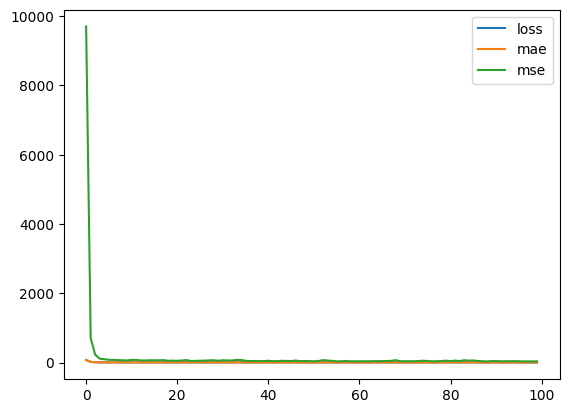

In [68]:
# Plot loss curve
pd.DataFrame(boston_history_1.history).plot()